In [1]:
#IMPORTAÇÕES NECESSÁRIAS PARA CRIAR O MODELO
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model

#from keras.callbacks import ModelCheckpoint
#IMPORTAÇÕES NECESSÁRIAS PARA CRIAR O MODELO

In [11]:
#PARÂMETROS VARIÁVEIS DO MODELO
batch_size = 32
num_classes = 10
epochs = 5
learning_rate = 0.001
#PARÂMETROS VARIÁVEIS DO MODELO

In [12]:
#IMPORTANDO E TRATANDO OS DADOS
#CONVERTENDO TIPOS E NORMALIZANDO OS VALORES
#CATEGORIZANDO OS VALORES DE RESPOSTAS
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [13]:
#CRIANDO MODELO COMPUTACIONAL
model = keras.Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.25))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes,activation = 'softmax'))

#CRIANDO MODELO COMPUTACIONAL

In [14]:
#COMPILANDO O MODELO
opt = keras.optimizers.RMSprop(learning_rate=learning_rate,decay=1e-6)

model.compile(loss = 'categorical_crossentropy',
             optimizer=opt,
             metrics = ['accuracy'])
#COMPILANDO O MODELO

In [15]:
#TREINANDO O MODELO
#checkpoint = ModelCheckpoint("C:/Users/gabri/Curso_Visao_Computacional/CIFAR10/best_model.h5", monitor='val_acc', verbose=1,
    #save_best_only=True, mode='max', period=1)

history = model.fit(x_train,y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test,y_test),
            shuffle=True)
#TREINANDO O MODELO

Epoch 1/5
1563/1563 [==============================] - 543s 334ms/step - loss: 1.5503 - accuracy: 0.4453 - val_loss: 1.2795 - val_accuracy: 0.5433
Epoch 2/5
1563/1563 [==============================] - 549s 351ms/step - loss: 1.1689 - accuracy: 0.5854 - val_loss: 1.1026 - val_accuracy: 0.6171
Epoch 3/5
1563/1563 [==============================] - 548s 351ms/step - loss: 1.0176 - accuracy: 0.6466 - val_loss: 1.0870 - val_accuracy: 0.6210
Epoch 4/5
1563/1563 [==============================] - 530s 339ms/step - loss: 0.9191 - accuracy: 0.6819 - val_loss: 0.9619 - val_accuracy: 0.6679
Epoch 5/5
1563/1563 [==============================] - 525s 336ms/step - loss: 0.8557 - accuracy: 0.7040 - val_loss: 0.9528 - val_accuracy: 0.6807


In [25]:
scores = model.evaluate(x_test,y_test,verbose=1,batch_size=128)
print('Best test loss:',scores[0])
print('Best test accuracy:',scores[1])

79/79 [==============================] - 4s 49ms/step - loss: 0.8295 - accuracy: 0.7227
Best test loss: 0.829457700252533
Best test accuracy: 0.7226999998092651


In [29]:
#SALVANDO O MODELO
from os import listdir
from os.path import isfile, join
mypath = "./save_models/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath,f))]
contador = len(file_names)

path = "C:/Users/gabri/Curso_Visao_Computacional/CIFAR10/save_models/"
name_model = "cifar_model_" + str(contador)
model.save(path + name_model + ".h5")
#SALVANDO O MODELO

In [30]:
#CRIANDO E MOSTRANDO A REPRESENTAÇÃO VISUAL DE UM MODELO
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

name_image = name_model + ".png"

plot_model(model,to_file = path+name_image,
          show_shapes = True,
          show_layer_names = True)

img = mpimg.imread(path+name_image)
plt.figure(figsize=(30,15))
#imgplot = plt.imshow(img) Mostra a representação
#CRIANDO E MOSTRANDO A REPRESENTAÇÃO VISUAL DE UM MODELO

<Figure size 2160x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

313/313 [==============================] - 2s 7ms/step - loss: 1.3183 - accuracy: 0.5377
sim
313/313 [==============================] - 4s 13ms/step - loss: 1.1974 - accuracy: 0.5887
sim
313/313 [==============================] - 5s 17ms/step - loss: 1.0337 - accuracy: 0.6421
sim
313/313 [==============================] - 5s 16ms/step - loss: 0.9251 - accuracy: 0.6781
sim
313/313 [==============================] - 5s 16ms/step - loss: 0.9959 - accuracy: 0.7233
sim
313/313 [==============================] - 6s 17ms/step - loss: 0.9602 - accuracy: 0.7301
sim
Best test loss: 0.9602260589599609
Best test accuracy: 0.7300999760627747


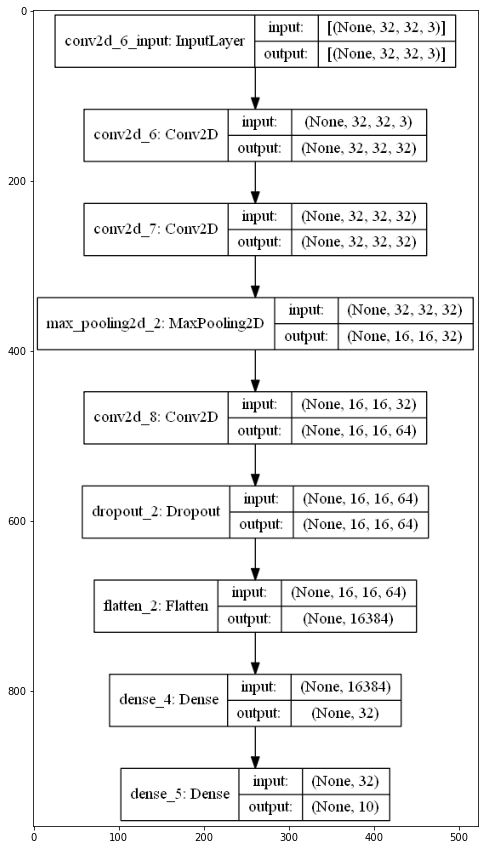

In [31]:
from os import listdir
from os.path import isfile, join
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

mypath = "./save_models/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath,f))]
contador = len(file_names)
path = "C:/Users/gabri/Curso_Visao_Computacional/CIFAR10/save_models/"

the_best_model = load_model(path + "cifar_model_0.h5")
scores_best_model = the_best_model.evaluate(x_test,y_test,verbose=0)
name_image = "cifar_model_0.png"

for i in range(2,contador,2):
    classifier = load_model("C:/Users/gabri/Curso_Visao_Computacional/CIFAR10/save_models/cifar_model_"+ str(i) +".h5")
    
    scores = classifier.evaluate(x_test,y_test,verbose=1)
    
    if scores[1] > scores_best_model[1]:
        print("sim")
        the_best_model = classifier
        scores_best_model = scores
        name_image = "cifar_model_" + str(i) +".png"

print('Best test loss:',scores_best_model[0])
print('Best test accuracy:',scores_best_model[1])

img = mpimg.imread(path+name_image)
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img)